<h1>"QR-Awesomeness"

The QR factorization is possibly one of the most elementary, but powerful factorizations in linear algebra. In Effective Quadratures, we leverage QR factorizations and QR column pivoting for solving least squares problems and for determining suitable points when constructing polynomial approximations to computational models. This notebook is simply an ode to QR factorization; written with the objective of showing you some of the QR methods coded in effective quadratures. We begin with the definition. For any matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$, there exists an orthogonal $\mathbf{Q} \in \mathbb{R}^{m \times m}$ and an upper triangular matrix $\mathbf{R} \in \mathbb{R}^{m \times n}$ so that 
$$\mathbf{A} = \mathbf{QR}.$$ 
For the proof of existence see [1] page 246. 

In [1]:
%matplotlib inline
import effective_quadratures.qr as qr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

We begin by defining a random matrix, $\mathbf{A}$

In [2]:
np.random.seed(1)
A = np.mat(np.random.randn(40,30), dtype='float64')
Amat = np.matrix.copy(A)
Q, R = qr.qr_Householder(Amat)

Let's double check that $\mathbf{Q}$ is indeed orthogonal

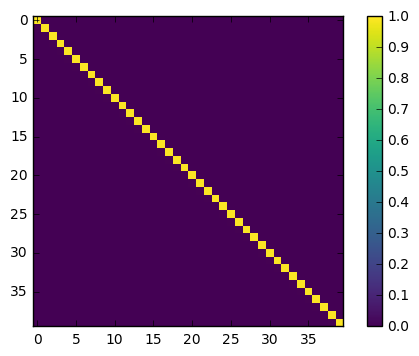

In [3]:
fig, ax = plt.subplots()
im = ax.imshow(Q.T * Q, cmap='viridis', vmin=0, vmax=1, interpolation='none')
fig.colorbar(im,orientation='vertical')
plt.show()

And the numerical accuracy of $\mathbf{A} - \mathbf{QR}$

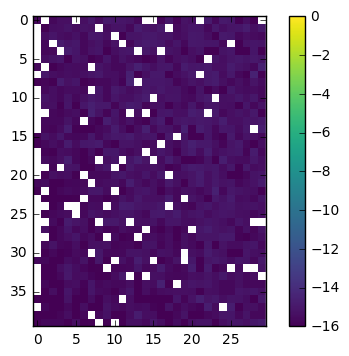

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(np.abs(A - Q*R)), cmap='viridis', vmin=-16, vmax=0, interpolation='none')
fig.colorbar(im,orientation='vertical')
plt.show()

And finally to double check that $\mathbf{R}$ is indeed upper triangular

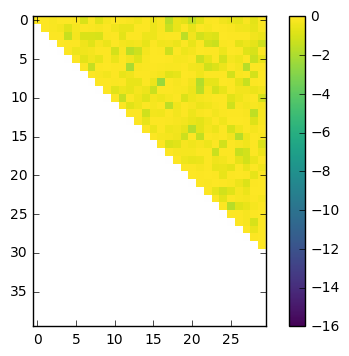

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(np.abs(R)), cmap='viridis', vmin=-16, vmax=0, interpolation='none')
fig.colorbar(im,orientation='vertical')
plt.show()

The above results were generated using the Householder QR factorization method. In Effective Quadratures, we have two more techniques for computing the QR factorization: Givens QR and Modified Gram-Schmidt QR. These can be called as follows. 

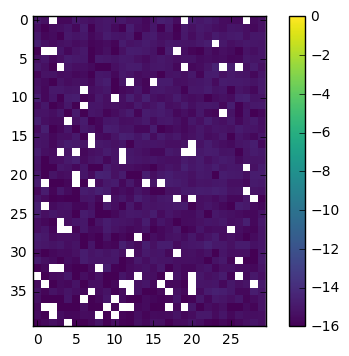

In [6]:
Amat = np.matrix.copy(A)
Q, R = qr.qr_Givens(Amat)
fig, ax = plt.subplots()
im = ax.imshow(np.log10(np.abs(A - Q*R)), cmap='viridis', vmin=-16, vmax=0, interpolation='none')
fig.colorbar(im,orientation='vertical')
plt.show()

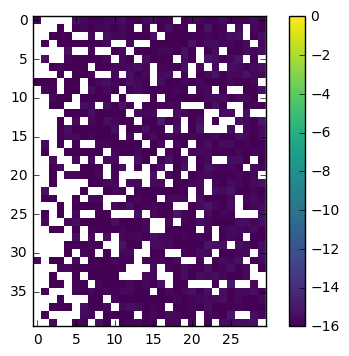

In [7]:
Amat = np.matrix.copy(A)
Q, R = qr.qr_MGS(Amat)
fig, ax = plt.subplots()
im = ax.imshow(np.log10(np.abs(A - Q*R)), cmap='viridis', vmin=-16, vmax=0, interpolation='none')
fig.colorbar(im,orientation='vertical')
plt.show()